In [102]:
import pandas as pd
import numpy as np
import html5lib
from matplotlib import dates
from statsmodels.tsa.filters.hp_filter import hpfilter
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_rows', None)

In [103]:
tables = pd.read_html("https://en.wikipedia.org/wiki/2020_coronavirus_pandemic_in_Germany")
#general_df = tables[0]

In [104]:
df = tables[3]

In [105]:
df.drop(df.tail(1).index,inplace=True) # drop last n rows

In [106]:
columns=[]
for i in range(len(df.columns)):
    columns.append(df.columns[i][1])

In [107]:
df.columns = columns

In [108]:
df.columns

Index(['Date', 'Baden-Württemberg', 'Bavaria', 'Berlin', 'Brandenburg',
       'Bremen', 'Hamburg', 'Hesse', 'Mecklenburg-Vorpommern', 'Lower Saxony',
       'North Rhine-Westphalia', 'Rhineland-Palatinate', 'Saarland', 'Saxony',
       'Saxony-Anhalt', 'Schleswig-Holstein', 'Thuringia',
       'Germany, repatriated[b]', 'Total infections', 'Total deaths',
       'New cases', 'New deaths'],
      dtype='object')

In [109]:
for i in range(len(df['Date'])):
#    print(df['Date'][i])
    df['Date'][i] = datetime.strptime(df['Date'][i]+' 2020', '%d %b %Y')

In [110]:
df['Date']

0     2020-02-24 00:00:00
1     2020-02-25 00:00:00
2     2020-02-26 00:00:00
3     2020-02-27 00:00:00
4     2020-02-28 00:00:00
5     2020-02-29 00:00:00
6     2020-03-01 00:00:00
7     2020-03-02 00:00:00
8     2020-03-03 00:00:00
9     2020-03-04 00:00:00
10    2020-03-05 00:00:00
11    2020-03-06 00:00:00
12    2020-03-07 00:00:00
13    2020-03-08 00:00:00
14    2020-03-09 00:00:00
15    2020-03-10 00:00:00
16    2020-03-11 00:00:00
17    2020-03-12 00:00:00
18    2020-03-13 00:00:00
19    2020-03-14 00:00:00
20    2020-03-15 00:00:00
21    2020-03-16 00:00:00
22    2020-03-17 00:00:00
23    2020-03-18 00:00:00
24    2020-03-19 00:00:00
25    2020-03-20 00:00:00
26    2020-03-21 00:00:00
27    2020-03-22 00:00:00
28    2020-03-23 00:00:00
29    2020-03-24 00:00:00
30    2020-03-25 00:00:00
31    2020-03-26 00:00:00
32    2020-03-27 00:00:00
33    2020-03-28 00:00:00
Name: Date, dtype: object

In [111]:
df['Date']=pd.to_datetime(df['Date'])
df = df.set_index(df['Date'])
df.drop(['Date'],axis=1,inplace=True)
#df.head()

In [112]:
#df.asfreq = 'MS'

In [113]:
Germany_states = ['Baden-Württemberg', 'Bavaria', 'Berlin', 'Brandenburg', 'Bremen',
       'Hamburg', 'Hesse', 'Mecklenburg-Vorpommern', 'Lower Saxony',
       'North Rhine-Westphalia', 'Rhineland-Palatinate', 'Saarland', 'Saxony',
       'Saxony-Anhalt', 'Schleswig-Holstein', 'Thuringia']

In [114]:
df.replace('—','0',inplace=True)

In [115]:
df.replace(" ", "_",regex=True,inplace=True)

In [116]:
for column in df.columns:
    
    df[column] = df[column].str.split('_',expand=True)[0]

In [117]:
for column in df.columns:
    df[column] = df[column].str.replace(r'\D', '0')

In [118]:
for column in df.columns:
    #for i in range(len(df[column])):
    #    print(column, type(df[column][i]))
    df[column] = pd.to_numeric(df[column])
#df.columns

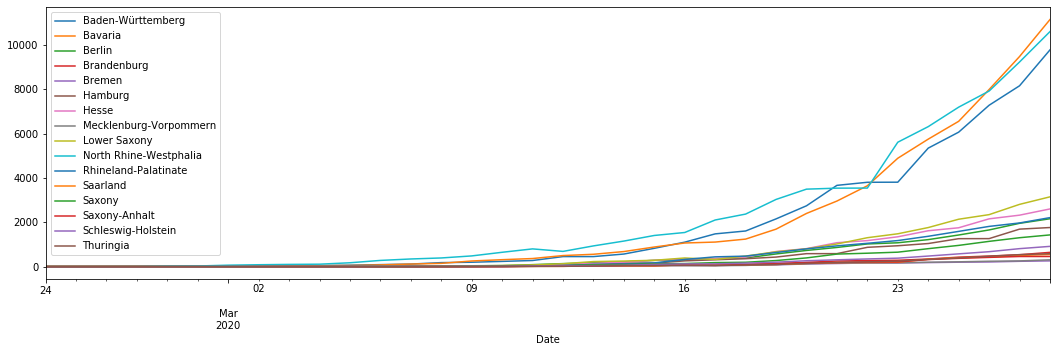

In [119]:
leg = []
for state in Germany_states:
    leg.append(state)
    df[state].plot(figsize=(18,5)).legend(leg)

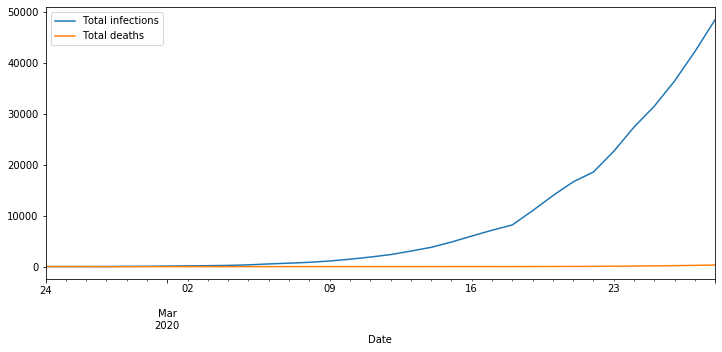

In [120]:
df[['Total infections', 'Total deaths']].plot(figsize=(12,5))

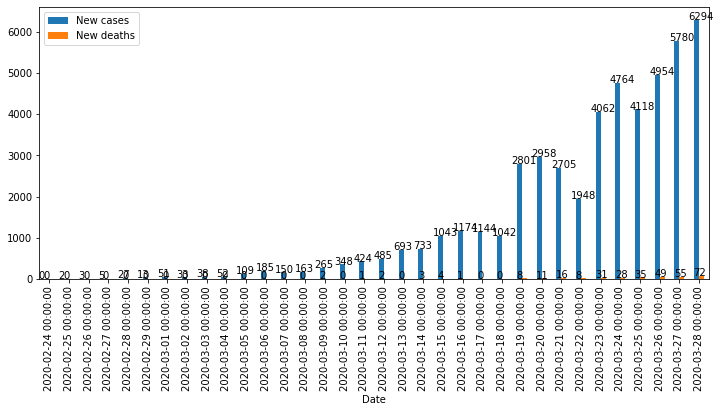

In [121]:
ax = df[['New cases', 'New deaths']].plot.bar(figsize=(12,5))
x_offset = -0.4
y_offset = 0.5
for p in ax.patches:
    b = p.get_bbox()
    val = "{:.0f}".format(b.y1 + b.y0)        
    ax.annotate(val, ((b.x0 + b.x1)/2 + x_offset, b.y1 + y_offset))


In [122]:
import math

In [123]:
DataLength = len(df['Total infections'])
train_data = df['Total infections'].iloc[:math.ceil(DataLength*4/5)-1]
test_data = df['Total infections'].iloc[math.ceil(DataLength*4/5)-1:]

In [124]:
#train_data, test_data

In [125]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [126]:
fitted_model = ExponentialSmoothing(train_data, trend='mul', seasonal='add').fit()

C:\Users\salmam\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\salmam\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\salmam\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\salmam\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


In [127]:
fitted_model

In [128]:
test_predictions = fitted_model.forecast(6)

In [129]:
test_predictions, test_data

(2020-03-22    20644.667102
 2020-03-23    25139.658076
 2020-03-24    30393.280543
 2020-03-25    36700.040135
 2020-03-26    44958.703928
 2020-03-27    54407.639431
 Freq: D, dtype: float64, Date
 2020-03-22    18610
 2020-03-23    22672
 2020-03-24    27436
 2020-03-25    31554
 2020-03-26    36508
 2020-03-27    42288
 2020-03-28    48582
 Name: Total infections, dtype: int64)

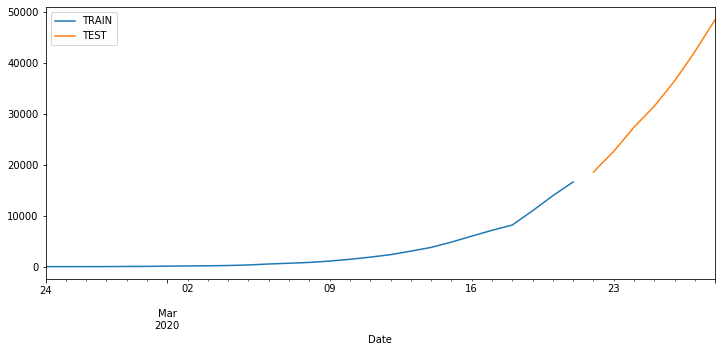

In [130]:
train_data.plot(legend=True, label='TRAIN', figsize=(12,5))
test_data.plot(legend=True, label='TEST', figsize=(12,5))

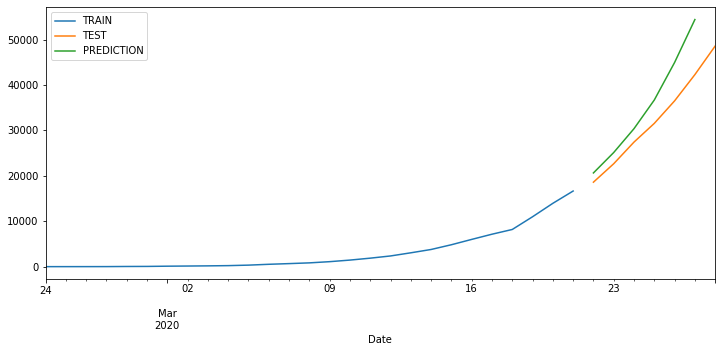

In [131]:
train_data.plot(legend=True, label='TRAIN', figsize=(12,5))
test_data.plot(legend=True, label='TEST', figsize=(12,5))
test_predictions.plot(legend=True, label='PREDICTION')

In [132]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [133]:
np.sqrt(mean_squared_error(test_data,test_predictions))

ValueError: Found input variables with inconsistent numbers of samples: [7, 6]

In [134]:
test_data.describe()

count        7.000000
mean     32521.428571
std      10697.018383
min      18610.000000
25%      25054.000000
50%      31554.000000
75%      39398.000000
max      48582.000000
Name: Total infections, dtype: float64

In [135]:
final_model = ExponentialSmoothing(df['Total infections'], trend='mul', seasonal='add').fit()

C:\Users\salmam\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\salmam\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\salmam\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


In [30]:
forecast_predictions = final_model.forecast(6)

NameError: name 'forecast_predictions' is not defined

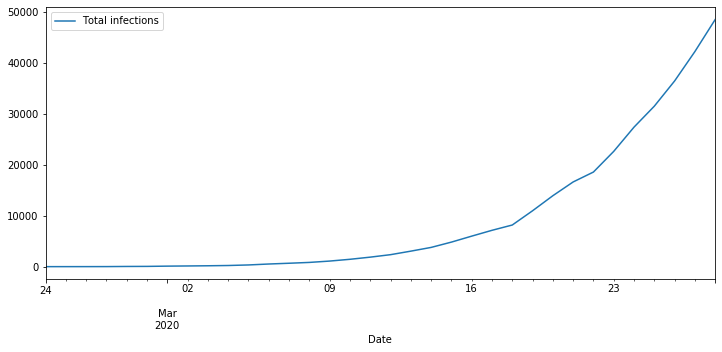

In [136]:
df['Total infections'].plot(legend=True, figsize=(12,5))
forecast_predictions.plot(legend=True, label='Forecase')

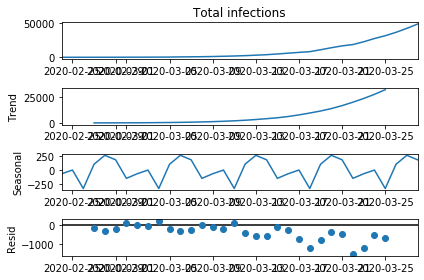

In [137]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df['Total infections'], model='add')  # model='mul' also works
result.plot();

In [138]:
import statsmodels.api as sm

In [139]:
from statsmodels.tsa.stattools import acovf, acf, pacf, pacf_yw, pacf_ols

In [140]:
import warnings
warnings.filterwarnings('ignore')

In [141]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

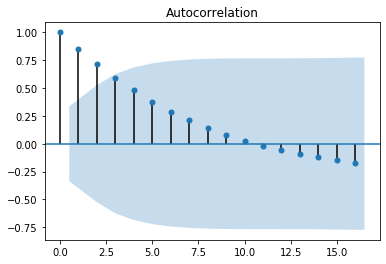

In [142]:
plot_acf(df['Total infections']);

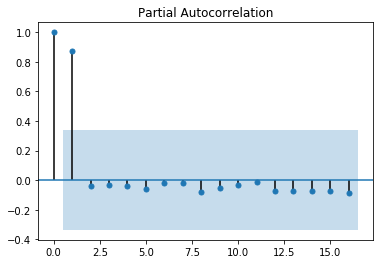

In [143]:
plot_pacf(df['Total infections']);

In [144]:
from statsmodels.tsa.ar_model import AR, ARResults

In [145]:
 model = AR(train_data)

In [146]:
AR1fit = model.fit(ic='t-stat')

In [147]:
AR1fit.params

const                  105.904301
L1.Total infections      1.032356
L2.Total infections     -0.869193
L3.Total infections      0.028777
L4.Total infections      3.060474
L5.Total infections     -3.218416
L6.Total infections      5.147838
L7.Total infections     -4.223306
dtype: float64

In [148]:
predictions1= AR1fit.predict(start=len(train_data),end=len(train_data)+len(test_data)-1)

In [149]:
test_data

Date
2020-03-22    18610
2020-03-23    22672
2020-03-24    27436
2020-03-25    31554
2020-03-26    36508
2020-03-27    42288
2020-03-28    48582
Name: Total infections, dtype: int64

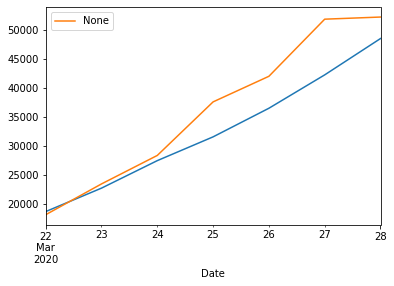

In [150]:
test_data.plot()
predictions1.plot(legend=True)

In [151]:
from pmdarima import auto_arima

ModuleNotFoundError: No module named 'pmdarima'

In [152]:
stepwise_fit = auto_arima(df['Total infections'],trace=True)

NameError: name 'auto_arima' is not defined

In [153]:
stepwise_fit.summary()

NameError: name 'stepwise_fit' is not defined

In [154]:
from statsmodels.tsa.statespace import sarimax

In [155]:
#model = sarimax(train_data, order=(2,2,0))
#res = model.fit()
#print(res.summary())

In [156]:
model = sm.tsa.statespace.SARIMAX(train_data, trend='c', order=(4,2,0))

In [157]:
result = model.fit()
#print(res.summary())

In [158]:
predictions= result.predict(start=len(train_data),end=len(train_data)+len(test_data)-1)

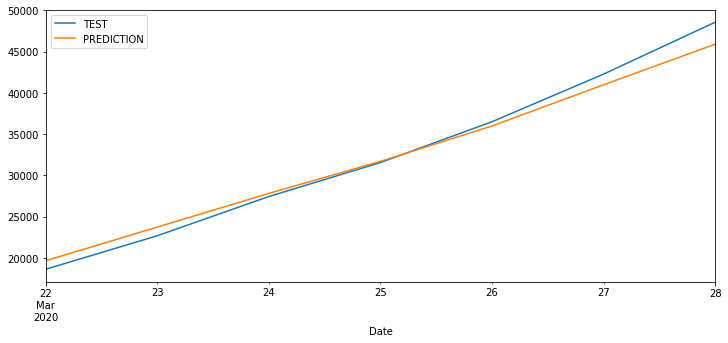

In [159]:
test_data.plot(figsize=(12,5),legend=True, label='TEST')
predictions.plot(legend=True, label='PREDICTION')

In [160]:
test_data.mean()

32521.428571428572

In [161]:
predictions.mean()

32253.09760941166

In [162]:
final_model = sm.tsa.statespace.SARIMAX(df['Total infections'], trend='c', order=(4,2,0)).fit()
forecast = final_model.forecast(6)

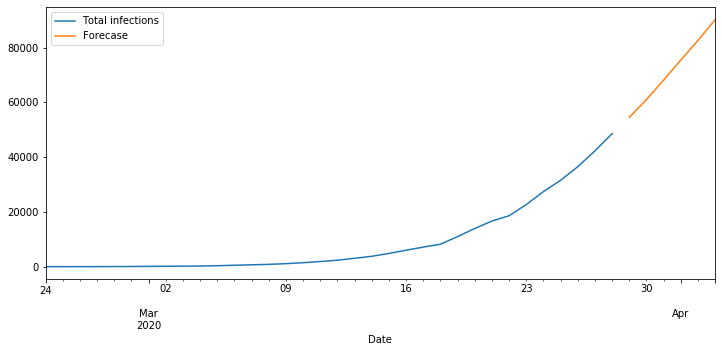

In [163]:
df['Total infections'].plot(legend=True, figsize=(12,5))
forecast.plot(legend=True, label='Forecase')
